1. 讀入資料，並判斷出那些數據格式不是數字，或是有缺失值。
2. 將非數字類型的資料進行編碼。
3. 填補缺失值。

In [13]:
import pandas as pd
import numpy as np

inputData = pd.read_csv("HW4_house-prices.csv")
inputDataCopy = inputData.copy()
heatmapData = inputData.drop("Id", axis=1)
textData = inputDataCopy.select_dtypes(include='object')

numericData = inputDataCopy.drop(textData.keys(), axis=1)
numericData = numericData.drop("Id", axis=1) 
mean = numericData.mean(axis=0) # axis=0 along with index
numericData.fillna(mean, inplace=True) # fill with mean number

encodedTextData = pd.get_dummies(textData) # one-hot
inputData = numericData.join(encodedTextData)



4. 將資料切割成訓練集 70%，預測集 30%。分別使用 Linear、Ridge、及 Lasso 三種 regression 模型預測 Rating，並使用 MSE（Mean-Squared-Error）作為預測準確度的指標。比較那一種模型較佳。

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

def trainPredictData(regModel):
    regModel.fit(trainData, trainLabel)
    prediction = linearReg.predict(testData)
    linearMse = mean_squared_error(testLabel, prediction)
    return linearMse


label = inputData["SalePrice"]
data = inputData.drop("SalePrice", axis=1)


trainData, testData, trainLabel, testLabel = train_test_split(data, label, test_size=0.3, random_state=42)
'''linear'''
linearReg = linear_model.LinearRegression()
linearMse = trainPredictData(linearReg)
'''ridge'''
ridgeReg = linear_model.Ridge()
ridgeMse = trainPredictData(ridgeReg)
'''lasso'''
lassoReg = linear_model.Lasso()
lassoMse = trainPredictData(lassoReg)
# not yet get ratting

threeModeMseDict = {"linear": linearMse, "ridge": ridgeMse, "lasso": lassoMse}
smallestMse = min(linearMse, ridgeMse, lassoMse)

key = [key for key, value in threeModeMseDict.items() if value == smallestMse]
print("Best Model: " + key[0])



Best Model: linear


C:\Users\BV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5. 依據最佳結果的模型，對預測集資料繪製出預測房價 vs 實際房價 之散佈(scatter plot)圖

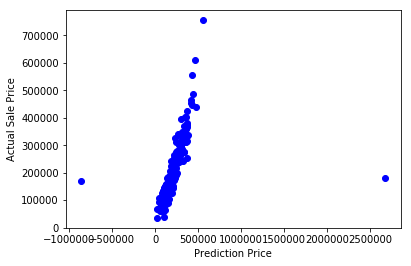

In [15]:
import matplotlib.pyplot as plt

prediction = linearReg.predict(testData)
figure = plt.figure()
axis = figure.add_subplot(111)
price = axis.scatter(prediction, testLabel, c="blue")
plt.xlabel("Prediction Price")
plt.ylabel("Actual Sale Price")
plt.show()

6. 比較將特徵值進行標準化前處理後之預測準確度

In [16]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
trainDataScaled = scaler.fit_transform(trainData.astype(np.float64))
linearReg.fit(trainDataScaled, trainLabel)
linearReg.score(testData, testLabel)
prediction = linearaReg.predict(testData)
scaledDataLinearMse = mean_squared_error(testLabel, prediction)
print("non scaled data: ",linearMse)
print("scaled data: ",scaledDataLinearMse)


NameError: name 'linearaReg' is not defined

7. 利用相關係數選取特徵使用：

利用 pandas 套件中 dataframe 之函數 corr()找出各特徵之間的
相關係數，並利用 seaborn 套件之 heatmap()函數繪製。

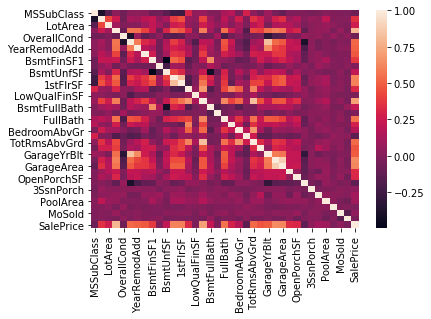

In [17]:
import seaborn as sns

corrMatrix = heatmapData.corr()
sns.heatmap(corrMatrix)
plt.show()

僅使用與房價最相關的前四高係數之特徵進行預測

In [18]:
sortedCorr = corrMatrix.sort_values(by="SalePrice", ascending=False)
top4List = sortedCorr.index[1:5] # return a list
linearReg.fit(trainData[top4List], trainLabel)
top4Score = linearReg.score(testData[top4List], testLabel)

僅使用與房價最相關的前四低係數之特徵進行預測

In [19]:
sortedCorr = corrMatrix.sort_values(by="SalePrice", ascending=True)
least4List = sortedCorr.index[0:4] # return a list
linearReg.fit(trainData[least4List], trainLabel)
least4Score = linearReg.score(testData[least4List], testLabel)

比較使用前四高、前四低及所有特徵三種狀況所得到預測準
確度的差異

In [20]:
linearReg.fit(trainData, trainLabel)

originalScore = linearReg.score(testData, testLabel)
print(testData)
print("前四高score: ",top4Score)
print("前四低score: ",least4Score)
print("所有特徵score: ",originalScore)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
892           20    70.000000     8414            6            8       1963   
1105          60    98.000000    12256            8            5       1994   
413           30    56.000000     8960            5            6       1927   
522           50    50.000000     5000            6            7       1947   
1036          20    89.000000    12898            9            5       2007   
614          180    21.000000     1491            4            6       1972   
218           50    70.049958    15660            7            9       1939   
1160         160    24.000000     2280            6            5       1978   
649          180    21.000000     1936            4            6       1970   
887           50    59.000000    16466            5            7       1955   
576           50    52.000000     6292            7            7       1928   
1252          20    62.000000     9858            5 

8. 利用 matplotlib 套件繪製特徵 GrLivArea 與房價 SalePrice 之散佈(scatter plot)圖，判斷是否有極端之 outliners，請將之移除後再比較預測準備度。

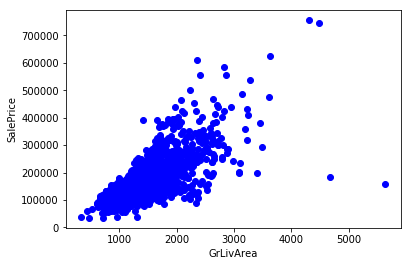

original score:  -1.5027327246712552
score of outlier remove:  1.0


In [21]:
figure = plt.figure()
axis = figure.add_subplot(111)
price = axis.scatter(data["GrLivArea"], label, c = 'blue')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()
'''remove outlier'''
nonOutlierData = inputData.copy()
for index, row in inputData.iterrows():
    if row["GrLivArea"] > 3500:
        nonOutlierData = nonOutlierData.drop(index)
    elif row["SalePrice"] > 600000:  
        nonOutlierData = nonOutlierData.drop(index)
trainData, testData, trainLabel, testLabel = train_test_split(nonOutlierData, nonOutlierData["SalePrice"], test_size=0.3, random_state=42)   
linearReg.fit(trainData, trainLabel)
print("original score: ", originalScore)
print("score of outlier remove: ", linearReg.score(testData, testLabel))